Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Mohamed Abdelaziz | 12137202 | 10.01.2022, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 5 &ndash; Your first neural networks</h2>

<b>Authors:</b> Brandstetter, Schäfl, Winter, Schlüter, Parada-Cabaleiro, Schörgenhumer<br>
<b>Date:</b> 13-12-2021

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

In [1]:
# Required packages and the u5_utils file
import u5_utils as u5
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch

from scipy.special import expit as sigmoid

u5.check_module_versions()
# Set plotting style of seaborn related plots.
sns.set()

Installed Python version: 3.9 (✓)
Installed numpy version: 1.21.1 (✓)
Installed pandas version: 1.3.1 (✓)
Installed scikit-learn version: 1.0 (✓)
Installed matplotlib version: 3.4.3 (✓)
Installed seaborn version: 0.11.2 (✓)
Installed scipy version: 1.7.1 (✓)
Installed torch version: 1.10.0+cpu (✓)
Installed tqdm version: 4.62.1 (✓)


**Note**: When specifying a seed for the sources of randomness, use the `u5.set_seed(seed=XYZ)` function.

# Exercise 1

Following the instructions given in the lecture notebook, perform the following tasks:

- Create a dataset by sampling $50$ values for $x$ and computing $y = 0.100 + 0.200 \cdot x$, then adding some noise (variance $0.5$) to $y$. For this, consider the function `get_dataset()` from <code>u5_utils.py</code>.

**Note**: For reproducibility, set a fixed seed (seed=23).

- Define a <i>linear</i> model with two coefficients $d$ and $k$ (polynomial of degree $1$), with which we will approximate the relation between $x$ and $y$.

- Define <i>Mean Squared Error (MSE)</i> as the loss function. Using the most elegant method from the lecture, find the optimum $d$ and $k$ minimizing the loss and print out the loss.

- Plot the resulting linear model along with the data.

**1.1. Create the dataset.**

In [2]:
u5.set_seed(seed=23)

dataset = u5.get_dataset(num_pairs=50, coefficients=(0.100, 0.200), variance=0.5)

**1.2. Define the linear model.**

In [3]:
def model(x, d, k):
    return d + k * x

**1.3. Define MSE as loss function. Minimize the loss and print it.**

In [4]:
def loss(dataset, d, k):
    predictions = model(dataset.x.values, d, k)
    targets = dataset.y.values
    return np.mean((targets - predictions) ** 2, axis=-1)

k, d = np.polyfit(x=dataset.x, y=dataset.y, deg=1)

loss(dataset, d, k)

0.22078537210785434

**1.4. Plot the linear model and the data.**

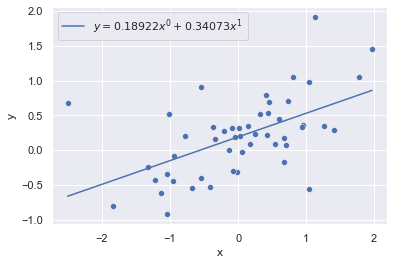

In [5]:
u5.plot_model(dataset, (d, k))

# Exercise 2

- Create a dataset with two variables, $x$ and $y$, where $y = 1$ for $x > 0.6$ and $y = 0$ otherwise. For this, use the function `get_dataset_logistic()` from <code>u5_utils.py</code>, with $75$ data points and variance $0.1$. Then, plot the dataset.

**Note**: For reproducibility, set a fixed seed (seed=23).

- Define a <i>logistic</i> model with two coefficients $d$ and $k$ to fit the created dataset.

- Define a suitable loss and corresponding gradient function.

- Visualize the loss landscape <i>including the gradient arrows</i>. For this, use the function `plot_loss_landscape()` from <code>u5_utils.py</code> for $d$ and $k$ in a range from $-10$ to $10$ each.

- Optimize the parameters $d$ and $k$ of the model using Gradient Descent. For this, use the function `plot_gradient_descent()` from <code>u5_utils.py</code>. As a starting point, use $d=-5$, $k=-5$, $1000$ iterations (steps), a step size (learning rate) of $1.0$ and a momentum of $0.0$.

- Print out the optimized values for $d$ and $k$ as well as the loss.

**2.1. Create and plot the dataset.**

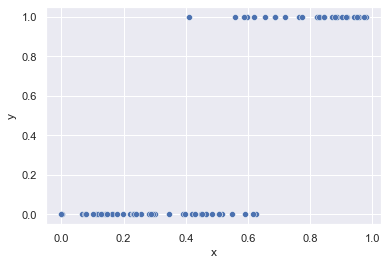

In [6]:
u5.set_seed(seed=23)

dataset = u5.get_dataset_logistic(
    num_pairs=75,   # number of data points
    threshold=0.6,  # position of class boundary
    variance=0.1    # amount of noise
)

sns.scatterplot(data=dataset, x="x", y="y");

**2.2. Define the logistic model.**

In [7]:
def model(x, d, k):
    return sigmoid(d + k * x)

**2.3. Define the loss function and its corresponding gradient function.**

In [8]:
def loss(dataset, d, k):
    predictions = model(dataset.x.values, d, k)
    targets = dataset.y.values
    return np.mean((predictions - targets)**2, axis=-1)

def loss_grad(dataset, d, k):
    predictions = model(dataset.x.values, d, k)
    targets = dataset.y.values
    delta = predictions - targets
    d_grad = np.mean(delta, axis=-1)
    k_grad = np.mean(dataset.x.values * delta, axis=-1)
    return d_grad, k_grad

**2.4. Define the ranges for $d$ and $k$ and plot the loss landscape including the gradient arrows.**

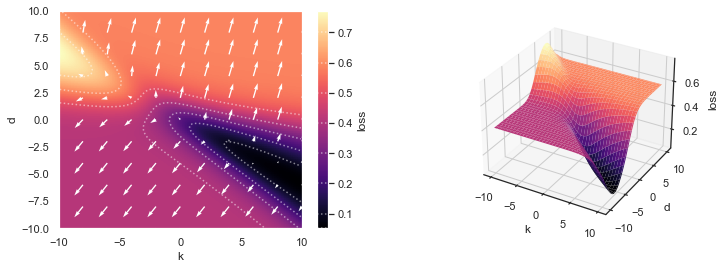

In [9]:
d_values = np.linspace(-10, 10, 101)
k_values = np.linspace(-10, 10, 101)
landscape = u5.plot_loss_landscape(loss, dataset, d=d_values, k=k_values, grad_fn=loss_grad)

**2.5. Perform gradient descent to optimize the model parameters.**

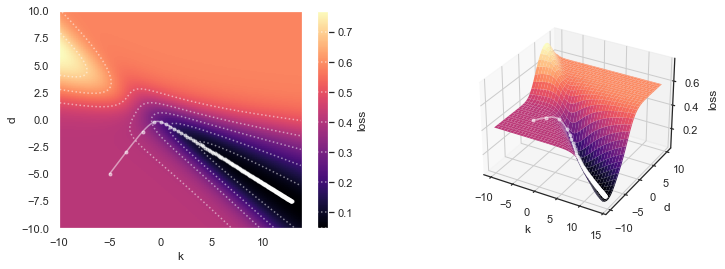

In [10]:
d, k = u5.plot_gradient_descent(loss, loss_grad, dataset,
                                d=-5, k=-5,
                                steps=1000, stepsize=1.0,
                                momentum=0.0)

**2.6. Print the values found for $d$ and $k$ and the corresponding loss.**

In [11]:
print(f"Final: d={d:9f}, k={k:9f}, loss={loss(dataset, d, k):9f}")

Final: d=-7.527506, k=12.879191, loss= 0.047809


# Exercise 3

Continuing with the dataset and the logistic model from Exercise 2, we will now replace the loss function with the Mean Squared Error (MSE) loss to see what happens. Since we also need its gradient, we prepared this for you.

- Visualize the loss landscape <i>including the gradient arrows</i>. For this, use the function `plot_loss_landscape()` from <code>u5_utils.py</code>, for $d$ and $k$ in a range from $-10$ to $10$ each.

- Optimize the parameters $d$ and $k$ of the model using Gradient Descent. Again, use the function `plot_gradient_descent()` from <code>u5_utils.py</code> to perform the optimization. Again, start from $d=-5$, $k=-5$, do $1000$ iterations (steps), use a step size (learning rate) of $1.0$ and a momentum of $0.0$.

- Print out the optimized values for $d$ and $k$ as well as the loss.

- In an extra cell, redo the optimization but change the starting position for $d$ and $k$ such that it finds a loss smaller than $0.1$.

**Note**: Look at the loss landscape to pick the position. Remember that gradient descent can be compared to a ball rolling down a hill.

- Again, print the optimized values for $d$ and $k$ and the loss.

In [12]:
# MSE loss and gradient of MSE loss for a logistic model
def loss(dataset, d, k):
    predictions = model(dataset.x.values, d, k)
    targets = dataset.y.values
    return np.mean((predictions - targets)**2, axis=-1)

def loss_grad(dataset, d, k):
    predictions = model(dataset.x.values, d, k)
    targets = dataset.y.values
    delta = 2 * (predictions - targets)  # grad of (predictions - targets)**2
    delta *= predictions * (1 - predictions)  # grad of sigmoid()
    d_grad = np.mean(delta, axis=-1)
    k_grad = np.mean(dataset.x.values * delta, axis=-1)
    return d_grad, k_grad

**3.1. Define the ranges for $d$ and $k$ and plot the loss landscape including the gradient arrows.**

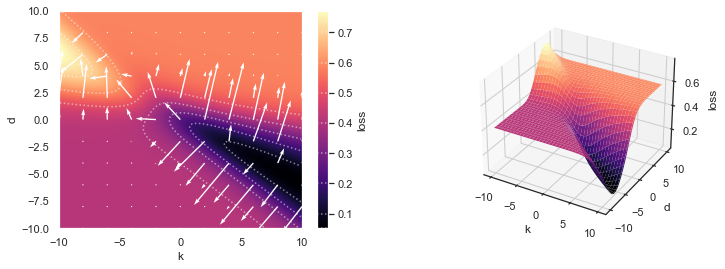

In [13]:
d_values = np.linspace(-10, 10, 101)
k_values = np.linspace(-10, 10, 101)
landscape = u5.plot_loss_landscape(loss, dataset,
                                   d=d_values, k=k_values,
                                   grad_fn=loss_grad)

**3.2. Perform gradient descent to optimize the model parameters.**

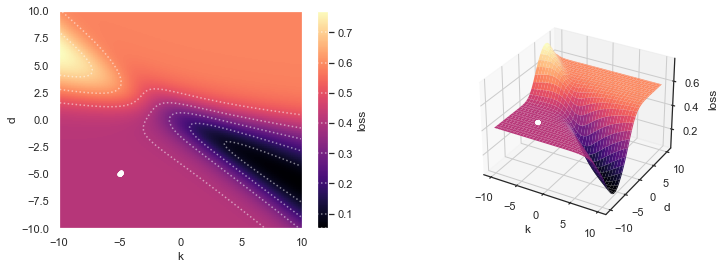

In [14]:
d, k = u5.plot_gradient_descent(loss, loss_grad, dataset,
                                d=-5, k=-5,
                                steps=1000, stepsize=1.0,
                                momentum=0.0)

**3.3. Print the values found for $d$ and $k$ and the corresponding loss.**

In [15]:
print(f"Final: d={d:9f}, k={k:9f}, loss={loss(dataset, d, k):9f}")

Final: d=-4.860773, k=-4.899753, loss= 0.413173


**3.4. Perform gradient descent from a better starting position (choose yourself!).**

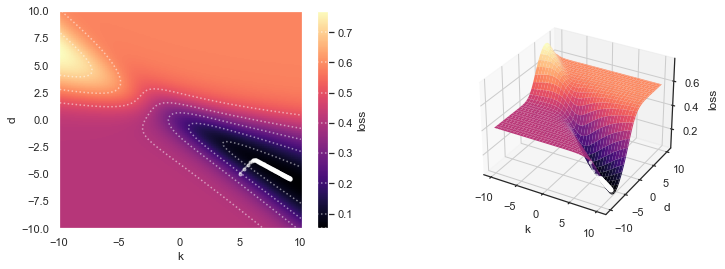

In [17]:
d, k = u5.plot_gradient_descent(loss, loss_grad, dataset,
                                d=-5, k=5,
                                steps=1000, stepsize=1.0,
                                momentum=0.0)

**3.5. Print the values found for $d$ and $k$ and the corresponding loss.**

In [18]:
print(f"Final: d={d:9f}, k={k:9f}, loss={loss(dataset, d, k):9f}")

Final: d=-5.433859, k= 9.183437, loss= 0.053566


# Exercise 4

- Considering again the dataset from Exercises 2 & 3, implement a logistic regression model in <code>pytorch</code> and define a suitable loss function and optimization method. For the optimization, set learning rate = $0.1$ and momentum = $0.0$.

**Note**: For reproducibility, set a fixed seed (seed=23).

- Run the optimization (get predictions, calculate loss, compute loss gradient, perform update step) until the loss is $\leq 0.17$ and print out the loss as well as the difference between the initial (randomly chosen) $d$ (bias) and $k$ (weight) and those achieved after optimization.

**Note**: Follow the lecture notebook to convert the input data and target to torch tensors for the optimization.

**4.1. Define the logistic model, the loss function and the gradient descent optimizer in `pytorch`.**

In [27]:
u5.set_seed(seed=23)

model = torch.nn.Linear(1, 1)
loss = torch.nn.functional.binary_cross_entropy_with_logits
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.0,)

**4.2. Run the optimization until the loss is $\leq 0.17$ and print the loss as well as the differences between $d$ and $k$ before and after this optimization.**

Initial: d=-0.422275, k=-0.143484, loss= 0.698535
Final:   d=-10.576372, k=18.140919, loss= 0.151791


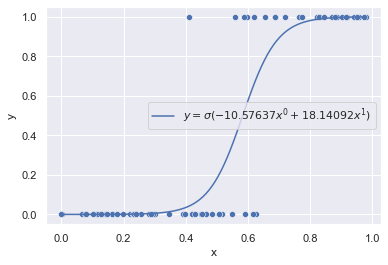

In [28]:
X = torch.as_tensor(dataset.x.values)[:, np.newaxis]
Y = torch.as_tensor(dataset.y.values)[:, np.newaxis]

d, k = model.bias.item(), model.weight.item()
error = loss(model(X), Y)

print(f"Initial: d={d:9f}, k={k:9f}, loss={error.item():9f}")


for _ in range(50000):
    preds = model(X)        # compute predictions
    error = loss(preds, Y)  # compute error
    error.backward()        # compute gradient of the error
    optimizer.step()        # perform update step
    optimizer.zero_grad()   # reset gradients for the next iteration
    
d, k = model.bias.item(), model.weight.item()
print(f"Final:   d={d:9f}, k={k:9f}, loss={error.item():9f}")
u5.plot_model(dataset, (d, k), transform=sigmoid)

# Exercise 5

With the dataset defined and plotted below (as given in the next cell), perform the following tasks:

**Note**: As usual, for reproducibility, set a fixed seed (seed=23).

- Implement a similar model as in Exercise 4, i.e., a logistic regression model in <code>pytorch</code>, considering Binary Cross-Entropy (BCE) as the loss funtion and Gradient Descent as the optimization method. For the optimization, set learning rate = $0.1$ and momentum = $0.9$. Then, run the optimization for $5000$ steps and print out the loss.

**Note**: This dataset is two-dimensional, i.e., it has $2$ input features called `x1` and `x2`. They need to be combined into a single torch tensor for the optimization. You can concatenate two torch vectors into a matrix with <a href="https://pytorch.org/docs/stable/generated/torch.stack.html#torch.stack"><code>torch.stack(..., dim=1)</code></a>, or you can directly assign the entire feature vector matrix <code>dataset[["x1", "x2"]].values</code> to a tensor.

**Note**: Your model will now need $2$ input nodes to handle $2$ features but still $1$ output node for binary classification.

- Visualize the predictions of the model with the code provided by us. Does the model manage to separate the $2$ classes? Does it look like it tried to separate them with a straight line?

- Implement a more complex model by adding a hidden layer with two nodes (the loss function and the Gradient Descent optimizer parameters remain the same). Then, print out the loss and visualize the predictions of the model with the code provided by us. Increase the number of nodes in the hidden layer, re-train the model and visualize the predictions until the classes are separated properly.

,x1,x2,y
0,0.666988,-1.707695,0.0
1,0.025813,0.409163,1.0
2,-0.777619,-0.514758,0.0
3,0.948634,-0.518663,1.0
4,0.701672,-0.816038,1.0


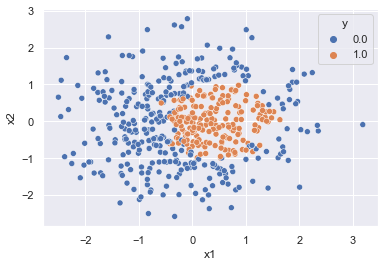

In [66]:
# set seed for reproducibility
u5.set_seed(seed=23)

# create dataset consisting of random (x, y) pairs
dataset = u5.get_dataset_blob2d(num_samples=500, variance=0.1, threshold=1.0, offset=(0.5, 0),)

# display the dataset
sns.scatterplot(data=dataset, x="x1", y="x2", hue="y")
dataset.head()

**5.1. Define the model, the loss function and the gradient descent optimizer. Run the optimization for $5000$ steps and print the loss.**

In [76]:
u5.set_seed(seed=23)

model = torch.nn.Linear(2, 1)
loss = torch.nn.functional.binary_cross_entropy_with_logits
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9,)

X = torch.as_tensor(dataset[["x1", "x2"]].values)
Y = torch.as_tensor(dataset[["y"]].values)

error = loss(model(X), Y)

print(f"Initial Loss: {error.item():9f}")

for _ in range(5000):
    preds = model(X)        # compute predictions
    error = loss(preds, Y)  # compute error
    error.backward()        # compute gradient of the error
    optimizer.step()        # perform update step
    optimizer.zero_grad()   # reset gradients for the next iteration

print(f"Final Loss: {error.item():9f}")

Initial Loss:  0.716146
Final Loss:  0.592780


Display the predictions. The following code assumes that the predictions from above are stored into a variable called `preds`. Adapt this if needed (or simply name your predictions above `preds`).

<AxesSubplot:xlabel='x1', ylabel='x2'>

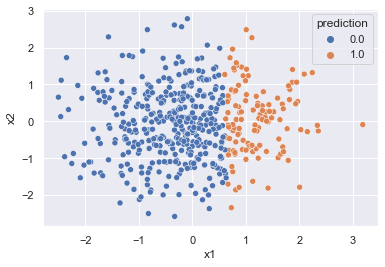

In [77]:
dataset["prediction"] = (preds.detach().sigmoid().numpy() > 0.5).astype(float)
sns.scatterplot(data=dataset, x="x1", y="x2", hue="prediction")

**5.2. Does the model manage to separate the 2 classes?**

No

**5.3. Does it look like it tried to separate them with a straight line?**

Yes

**5.4. Define a more complex model (same loss function and gradient descent optimizer parameters). Run the optimization for $5000$ steps and print the loss.**

In [91]:
u5.set_seed(seed=23)

model = torch.nn.Sequential(torch.nn.Flatten(),
                            torch.nn.Linear(2, 4),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(4, 1))

loss = torch.nn.functional.binary_cross_entropy_with_logits
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9,)

X = torch.as_tensor(dataset[["x1", "x2"]].values)
Y = torch.as_tensor(dataset[["y"]].values)

error = loss(model(X), Y)

print(f"Initial Loss: {error.item():9f}")

for _ in range(20000):
    preds = model(X)        # compute predictions
    error = loss(preds, Y)  # compute error
    error.backward()        # compute gradient of the error
    optimizer.step()        # perform update step
    optimizer.zero_grad()   # reset gradients for the next iteration

print(f"Final Loss: {error.item():9f}")

Initial Loss:  0.671082
Final Loss:  0.096849


Display the predictions with the more complex model. The following code assumes that the predictions from above are stored into a variable called `preds`. Adapt this if needed (or simply name your predictions above `preds`).

Repeat step **5.4.** until the model properly separates the two classes (a visual check is sufficient).

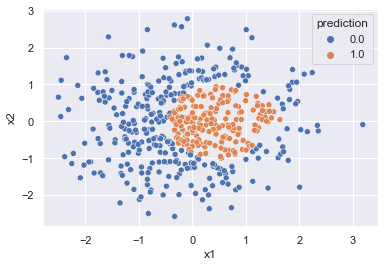

In [92]:
dataset["prediction"] = (preds.detach().sigmoid().numpy() > 0.5).astype(float)
sns.scatterplot(data=dataset, x="x1", y="x2", hue="prediction");

# Exercise 6

Following the instruction given in the lecture notebook, perform the following tasks, but this time, considering the <b>Fashion-MNIST</b> dataset. More information about the dataset can be found in this publication:

Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf (2017). [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

To load the Fashion-MNIST dataset and take a look at a preview of $5$ samples, run the cell below (provided by us).

**Note**: The first time you run this, it will download the dataset. You may see a <code>UserWarning: The given NumPy array is not writeable</code>. This can be safely ignored.

- Like the MNIST dataset, the Fashion-MNIST has input images of $28 \times 28 = 784$ pixels and $10$ classes. Considering this, define a Neural Network model with one hidden layer consisting of $15$ nodes. 

**Note**. For reproducibility, set a fixed seed (seed=23).

- Reload the dataset considering $15\%$ of the samples as validation set and train the model with the following hyperparameters: batch size = $25$, iterations = $5$, momentum = $0.7$ and learning rate = $0.01$. Use the function <code>run_gradient_descent()</code> from <code>u5_utils.py</code>.

**Note**. For reproducibility, set a fixed seed (seed=23). It will need to be set both before defining the model and before the optimization (which includes grabbing samples from the dataset). Otherwise, changes in the model would change the train/validation split samples, since both draw random numbers.

- Plot the training and validation losses and print out the accuracy on the test set.

- Keeping the partitioning as before, can you optimize the model in order to achieve an accuracy on the test set > $86\%$ (there are various ways to achieve this)? Plot the training and validation losses to show that your model does not overfit to the training data and print out the accuracy on test to show that it is better than $86\%$.

**Note**. For optimization, vary the following hyperparameters: batch size, iterations, learning rate, momentum, number of layers, number of nodes and type of nonlinearity. You may also try randomly flipping training images to perform data augmentation (provided by <code>get_dataset_mnist()</code>). Do not vary the validation set size, as that would increase the training set size.

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting resources\FashionMNIST\raw\train-images-idx3-ubyte.gz to resources\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting resources\FashionMNIST\raw\train-labels-idx1-ubyte.gz to resources\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting resources\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to resources\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting resources\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to resources\FashionMNIST\raw



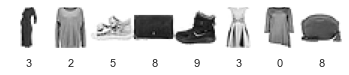

In [93]:
# load the dataset with custom batch size
train_loader, valid_loader, test_loader = u5.get_dataset_mnist(
    root="resources",
    variant="FashionMNIST",
    batch_size=8,
    valid_size=0.10
)

# load the first batch of data (set seed for reproducibility)
u5.set_seed(seed=23)
images, labels = next(iter(train_loader))
# transform the image shapes for visualization purposes
images = np.concatenate([img.squeeze() for img in images], axis=1)

# display the first batch of data
with plt.style.context({"axes.grid": False, "xtick.bottom": False}):
    plt.imshow(images, cmap="binary")
    plt.xticks(14 + np.arange(len(labels)) * 28, labels.numpy())
    plt.yticks([])

**6.1. Define the model with one hidden layer of $15$ nodes.**

In [114]:
u5.set_seed(seed=23)

model = torch.nn.Sequential(torch.nn.Flatten(), torch.nn.Linear(784, 15), torch.nn.Sigmoid(), torch.nn.Linear(15, 10))

**6.2. Reload the dataset with $15\%$ validation data. Define the loss function. Run the optimization.**

In [115]:
u5.set_seed(seed=23)

train_loader, valid_loader, test_loader = u5.get_dataset_mnist(
    root="resources",
    variant="FashionMNIST",
    batch_size=25,
    valid_size=0.15)

u5.set_seed(seed=23)

loss = torch.nn.functional.cross_entropy

u5.set_seed(seed=23)

losses = u5.run_gradient_descent(
    model=model,
    loss=loss,
    training_set=train_loader,
    valid_set=valid_loader,
    iterations=5,        # number of iterations/epochs over the training set
    learning_rate=0.01,  # step size/learning rate
    momentum=0.7         # momentum
)

  0%|          | 0/51000 [00:00<?, ?it/s]

Epoch 1 finished with training loss: 0.9420297345110015
Epoch 2 finished with training loss: 0.5346310313206677
Epoch 3 finished with training loss: 0.4650839749541061
Epoch 4 finished with training loss: 0.43452410739207387
Epoch 5 finished with training loss: 0.41743046279412277


**6.3. Plot the training and validation losses and print the accuracy on the test set.**

Test set:
{'loss': 0.4535802588239312, 'accuracy': 0.8419999971985817}


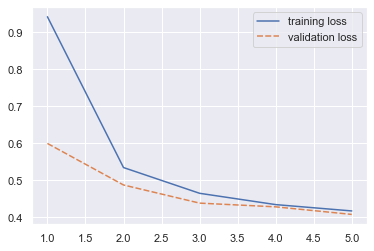

In [116]:
sns.lineplot(data=losses)

print("Test set:")
print(u5.evaluate_model(model, test_loader, loss=loss,
                        accuracy=u5.multiclass_accuracy))

**6.4. Optimize the model in order to achieve an accuracy on the test set > $86\%$. Plot the training and validation losses and print the accuracy on the test set.**

  0%|          | 0/51000 [00:00<?, ?it/s]

Epoch 1 finished with training loss: 1.2563633986781626
Epoch 2 finished with training loss: 0.636404042080337
Epoch 3 finished with training loss: 0.4952621008981677
Epoch 4 finished with training loss: 0.4369803425333664
Epoch 5 finished with training loss: 0.4031957918420142
Epoch 6 finished with training loss: 0.3796805253011339
Epoch 7 finished with training loss: 0.3603389037006042
Epoch 8 finished with training loss: 0.3459714960336101
Epoch 9 finished with training loss: 0.33308531070602876
Epoch 10 finished with training loss: 0.32305818791482965
Epoch 11 finished with training loss: 0.3120996140498741
Epoch 12 finished with training loss: 0.30321346135189137
Epoch 13 finished with training loss: 0.294211783884641
Epoch 14 finished with training loss: 0.28631279002729
Epoch 15 finished with training loss: 0.2796084925963306
Epoch 16 finished with training loss: 0.2716696179103033
Epoch 17 finished with training loss: 0.26511403055094623
Epoch 18 finished with training loss: 0.

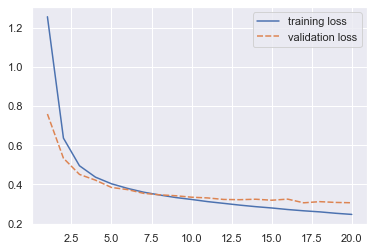

In [164]:
u5.set_seed(seed=23)

model = torch.nn.Sequential(torch.nn.Flatten(),
                            torch.nn.Linear(784, 110),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(110, 50),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(50, 10)
                           )

u5.set_seed(seed=23)

train_loader, valid_loader, test_loader = u5.get_dataset_mnist(
    root="resources",
    variant="FashionMNIST",
    batch_size=20,
    valid_size=0.15)

u5.set_seed(seed=23)

loss = torch.nn.functional.cross_entropy

u5.set_seed(seed=23)

losses = u5.run_gradient_descent(
    model=model,
    loss=loss,
    training_set=train_loader,
    valid_set=valid_loader,
    iterations=20,        # number of iterations/epochs over the training set
    learning_rate=0.01,  # step size/learning rate
    momentum=0.7        # momentum
)

sns.lineplot(data=losses)

print("Test set:")
print(u5.evaluate_model(model, test_loader, loss=loss,
                        accuracy=u5.multiclass_accuracy))